<h3>Image Compression</h3>
First, load the necessary libraries and load the image:

In [2]:
import numpy as np
from matplotlib import image as img
from matplotlib import pyplot as plt

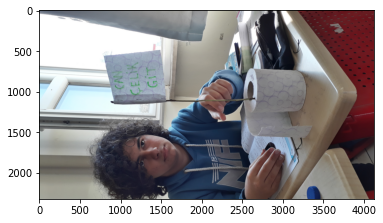

In [3]:
image = img.imread("ccg.jpg")
plt.imshow(image)

To apply operations, we must get rid of the RGB values and make it grayscale. First convert it to a matrix and get the average of R, G, B values.

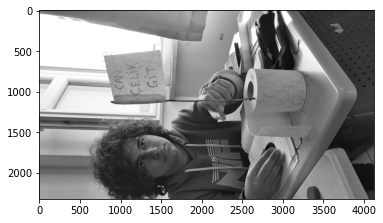

In [16]:
image_matrix = np.asarray(image)
image_r = image_matrix[:,:,0]
image_g = image_matrix[:,:,1]
image_b = image_matrix[:,:,2]
cna_matrix = image_r / 3 + image_g / 3 + image_b / 3
plt.imshow(cna_matrix, cmap="gray")

Now the compression part, we have to do singular value decomposition.

In [81]:
print("Matrix shape: {}".format(cna_matrix.shape))
u, sigma, v = np.linalg.svd(cna_matrix)

Matrix shape: (2322, 4128)


Check sigma

In [82]:
print(sigma)
print(len(sigma))

[4.17703830e+05 7.64443644e+04 5.02683456e+04 ... 2.48317037e+01
 2.47626042e+01 2.40312428e+01]
2322


Check if they are ordered

In [83]:
def check_if_ordered(vec):
    is_ordered = True
    for i in range(len(vec) - 1):
        vec1 = vec[i]
        vec2 = vec[i + 1]
        if vec2 > vec1:
            print("Vec1: {}, index: {}".format(vec1, i))
            print("Vec2: {}, index: {}".format(vec2, i + 1))
            is_ordered = False
            break
    print(f"Is ordered {is_ordered}") 
    
check_if_ordered(sigma)


Is ordered True


Now we can define the compression rate, higher this value is the more compressed the image.

In [94]:
compression_rate = 0.99
selected_eigenvalue_count = np.floor(len(sigma) * (1-compression_rate))
if(selected_eigenvalue_count == 0):
    selected_eigenvalue_count = 1
selected_eigenvalue_count = int(selected_eigenvalue_count)
print(selected_eigenvalue_count)

23


Chop matrices

In [95]:
print("U shape: {}, Sigma shape: {}, V shape: {}".format(u.shape, sigma.shape, v.shape))
u_chopped = u[:,:selected_eigenvalue_count]
sigma_chopped = np.diag(sigma[:selected_eigenvalue_count])
v_chopped = v[:selected_eigenvalue_count,:]
print("U chopped shape: {}, Sigma chopped shape: {}, V chopped shape: {}".format(u_chopped.shape, sigma_chopped.shape, v_chopped.shape))

U shape: (2322, 2322), Sigma shape: (2322,), V shape: (4128, 4128)
U chopped shape: (2322, 23), Sigma chopped shape: (23, 23), V chopped shape: (23, 4128)


Recreate the matrix

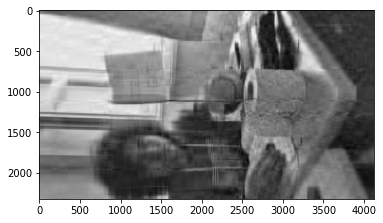

In [99]:
cna_compressed = np.dot(np.dot(u_chopped,sigma_chopped), v_chopped)

plt.imshow(cna_compressed, cmap="gray")

plt.imsave("cna_before.bmp", cna_matrix, cmap="gray")
plt.imsave("cna_after.bmp", cna_compressed, cmap="gray")